<a href="https://colab.research.google.com/github/BaburShahbaz/Pandas/blob/main/California_Housing_and_Cat_breed_01_249242_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inferential Statistics with California Housing Dataset**


This assignment explores inferential statistics using the California Housing dataset.
We'll cover sampling, bias, confidence intervals, and hypothesis testing.
    

## **1. Load and Explore the Dataset**

Load the California Housing dataset and inspect its structure and any missing values.

In [39]:

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import resample
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)
housing_data = housing.frame

# Display the first few rows
housing_data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## **2. Population and Sampling**

Define population, sample, and calculate sampling error for mean median house value.

In [40]:

# Population Mean Median House Value
population_median_house_value = housing_data['MedHouseVal'].mean()
print(f"Population Mean Median House Value: {population_median_house_value:.2f}")

# Simple Random Sample of 100 districts
sample_data = housing_data.sample(n=100, random_state=42)
sample_median_house_value = sample_data['MedHouseVal'].mean()
print(f"Sample Mean Median House Value: {sample_median_house_value:.2f}")

# Sampling Error
sampling_error = abs(population_median_house_value - sample_median_house_value)
print(f"Sampling Error (Difference): {sampling_error:.2f}")


Population Mean Median House Value: 2.07
Sample Mean Median House Value: 1.95
Sampling Error (Difference): 0.12


## **3. Sampling Methods**

Implement simple random, stratified, and systematic sampling.

In [41]:


# Assume housing_data DataFrame is already defined

# Simple Random Sampling (100 samples)
random_sample = housing_data.sample(n=100)

# Stratified Sampling (by housing_median_age)
housing_data['AgeCategory'] = pd.cut(housing_data['HouseAge'], bins=[0, 20, 40, 100], labels=['Low', 'Medium', 'High'])
stratified_sample = housing_data.groupby('AgeCategory', group_keys=False).apply(lambda x: x.sample(30, random_state=42)).reset_index(drop=True)

# Systematic Sampling (every 20th district sorted by median_income)
systematic_sample = housing_data.sort_values('MedInc').iloc[::20]

# Display Sample Sizes
print("Simple Random Sample Size:", len(random_sample))
print("Stratified Sample Size:", len(stratified_sample))
print("Systematic Sample Size:", len(systematic_sample))



Simple Random Sample Size: 100
Stratified Sample Size: 90
Systematic Sample Size: 1032


<ipython-input-41-8ac8fbb3e4aa>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified_sample = housing_data.groupby('AgeCategory', group_keys=False).apply(lambda x: x.sample(30, random_state=42)).reset_index(drop=True)
<ipython-input-41-8ac8fbb3e4aa>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = housing_data.groupby('AgeCategory', group_keys=False).apply(lambda x: x.sample(30, random_state=42)).reset_index(drop=True)


## **4. Sampling Bias**

Compare biased sample (median_income > 5) to random sample on median house value.

Biased Sample Mean Median House Value: 3.29
Random Sample Mean Median House Value: 1.87


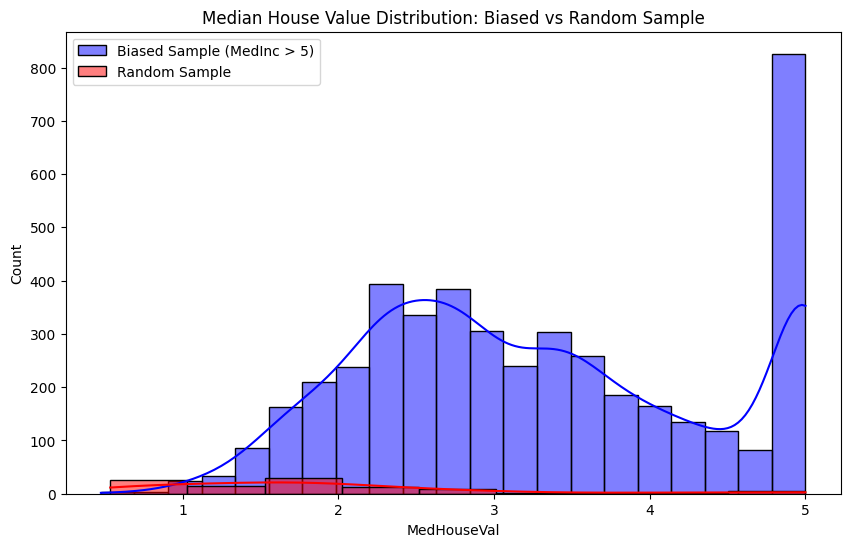

In [42]:

# Biased Sample - Only districts with high median_income
biased_sample = housing_data[housing_data['MedInc'] > 5]
biased_mean_median_house_value = biased_sample['MedHouseVal'].mean()
random_mean_median_house_value = random_sample['MedHouseVal'].mean()

print(f"Biased Sample Mean Median House Value: {biased_mean_median_house_value:.2f}")
print(f"Random Sample Mean Median House Value: {random_mean_median_house_value:.2f}")

# Plot comparison
plt.figure(figsize=(10, 6))
sns.histplot(biased_sample['MedHouseVal'], color='blue', label='Biased Sample (MedInc > 5)', kde=True)
sns.histplot(random_sample['MedHouseVal'], color='red', label='Random Sample', kde=True)
plt.legend()
plt.title("Median House Value Distribution: Biased vs Random Sample")
plt.show()


## **5. Imbalanced Data**

Identify and handle imbalanced `housing_median_age` categories.

In [43]:

# Check class distribution of AgeCategory
age_category_counts = housing_data['AgeCategory'].value_counts()
print("Age Category Distribution:", age_category_counts)

# Oversample minority classes to balance the dataset
balanced_data = housing_data.copy()
for level in age_category_counts.index[1:]:
    sample = balanced_data[balanced_data['AgeCategory'] == level]
    balanced_data = pd.concat([balanced_data, resample(sample, replace=True, n_samples=age_category_counts.max(), random_state=42)])

print("New Age Category Distribution after balancing:", balanced_data['AgeCategory'].value_counts())


Age Category Distribution: AgeCategory
Medium    10469
Low        6293
High       3878
Name: count, dtype: int64
New Age Category Distribution after balancing: AgeCategory
Low       16762
High      14347
Medium    10469
Name: count, dtype: int64


## **6. Central Limit Theorem (CLT)**

Draw 100 samples of 30 districts and plot the sampling distribution of mean median house values.

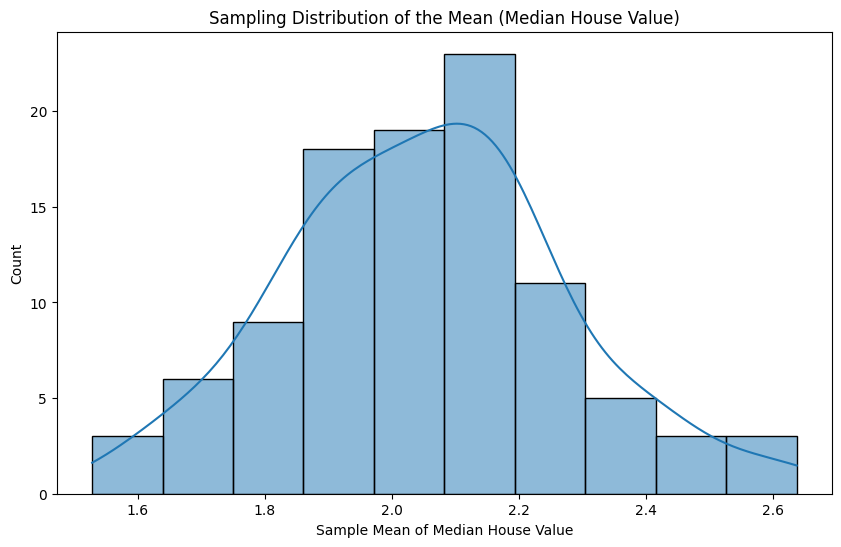

In [44]:

# Generate Sampling Distribution of Means
sample_means = [housing_data['MedHouseVal'].sample(30, replace=True).mean() for _ in range(100)]

# Plot Sampling Distribution
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True)
plt.title("Sampling Distribution of the Mean (Median House Value)")
plt.xlabel("Sample Mean of Median House Value")
plt.show()


## **7. Confidence Intervals**

Calculate 95% confidence interval for the mean population density (people per district).

In [45]:

# Random Sample of 100 districts for population density
sample_population_density = housing_data['Population'].sample(100, random_state=42)

# Mean Population Density and Confidence Interval
sample_mean_population = sample_population_density.mean()
conf_interval = stats.norm.interval(0.95, loc=sample_mean_population, scale=stats.sem(sample_population_density))

print(f"Mean Population Density: {sample_mean_population:.2f}")
print(f"95% Confidence Interval for Mean Population Density: {conf_interval}")


Mean Population Density: 1488.58
95% Confidence Interval for Mean Population Density: (1296.1138266022786, 1681.0461733977213)


## **8. Hypothesis Testing**


Test if districts with above-average `median_income` have a higher average `median_house_value`.

- Null Hypothesis (H₀): There is no difference in mean median house value between high-income and low-income districts.
- Alternative Hypothesis (H₁): High-income districts have a significantly higher median house value.
    

In [46]:

# Split data based on median_income mean
income_mean = housing_data['MedInc'].mean()
high_income = housing_data[housing_data['MedInc'] > income_mean]['MedHouseVal']
low_income = housing_data[housing_data['MedInc'] <= income_mean]['MedHouseVal']

# Perform Independent T-Test
t_stat, p_value = stats.ttest_ind(high_income, low_income, alternative='greater')
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - high-income districts have a significantly higher median house value.")
else:
    print("Fail to reject the null hypothesis - no significant difference in house value based on income level.")


T-Statistic: 90.22, P-Value: 0.0000
Reject the null hypothesis - high-income districts have a significantly higher median house value.



### **Summary**
This assignment covered:

- Population vs. Sample: Calculated sampling error in mean median house value.
- Sampling Methods: Implemented random, stratified, and systematic sampling.
- Sampling Bias: Compared biased and random samples on median house value.
- Imbalanced Data: Applied oversampling to balance age categories.
- Central Limit Theorem: Demonstrated with sampling distribution of mean house values.
- Confidence Intervals: Computed for mean population density.
- Hypothesis Testing: T-tested for differences in house value by income level.
    

In [47]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   MedInc       20640 non-null  float64 
 1   HouseAge     20640 non-null  float64 
 2   AveRooms     20640 non-null  float64 
 3   AveBedrms    20640 non-null  float64 
 4   Population   20640 non-null  float64 
 5   AveOccup     20640 non-null  float64 
 6   Latitude     20640 non-null  float64 
 7   Longitude    20640 non-null  float64 
 8   MedHouseVal  20640 non-null  float64 
 9   AgeCategory  20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [48]:
housing_data['AgeCategory']

,AgeCategory
0,High
1,Medium
2,High
3,High
4,High
...,...
20635,Medium
20636,Low
20637,Low
20638,Low


#**Inferential Statistics with CatBreed Dataset**

This assignment explores inferential statistics using the CatBreed dataset. We'll cover sampling, bias, confidence intervals, and hypothesis testing.

# **1. Load and Explore CatBreed Dataset**

Load the catbreed dataset and inspect its structure and any missing values.

In [49]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.utils import resample
from sklearn.datasets import fetch_california_housing

# Load dataset
file_pathc="/content/cat_breeds_updated.csv"
a=pd.read_csv(file_pathc)
# Display the first few rows
a.head()

,weight (kg),id,cat breed,cfa_url,vetstreet_url,vcahospitals_url,temperament,origin,country_codes,country_code,...,rex,suppressed_tail,short_legs,wikipedia_url,hypoallergenic,reference_image_id,image,cat_friendly,bidability,lifespan_years
0,3.9,abys,Abyssinian,http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx,http://www.vetstreet.com/cats/abyssinian,https://vcahospitals.com/know-your-pet/cat-bre...,"Active, Energetic, Independent, Intelligent, G...",Egypt,EG,EG,...,0,0,0,https://en.wikipedia.org/wiki/Abyssinian_(cat),0,0XYvRd7oD,"{'id': '0XYvRd7oD', 'width': 1204, 'height': 1...",NaN,NaN,14
1,3.9,aege,Aegean,NaN,http://www.vetstreet.com/cats/aegean-cat,NaN,"Affectionate, Social, Intelligent, Playful, Ac...",Greece,GR,GR,...,0,0,0,https://en.wikipedia.org/wiki/Aegean_cat,0,ozEvzdVM-,"{'id': 'ozEvzdVM-', 'width': 1200, 'height': 8...",NaN,NaN,10
2,5.2,abob,American Bobtail,http://cfa.org/Breeds/BreedsAB/AmericanBobtail...,http://www.vetstreet.com/cats/american-bobtail,https://vcahospitals.com/know-your-pet/cat-bre...,"Intelligent, Interactive, Lively, Playful, Sen...",United States,US,US,...,0,1,0,https://en.wikipedia.org/wiki/American_Bobtail,0,hBXicehMA,"{'id': 'hBXicehMA', 'width': 1600, 'height': 9...",NaN,NaN,13
3,3.4,acur,American Curl,http://cfa.org/Breeds/BreedsAB/AmericanCurl.aspx,http://www.vetstreet.com/cats/american-curl,https://vcahospitals.com/know-your-pet/cat-bre...,"Affectionate, Curious, Intelligent, Interactiv...",United States,US,US,...,0,0,0,https://en.wikipedia.org/wiki/American_Curl,0,xnsqonbjW,"{'id': 'xnsqonbjW', 'width': 1000, 'height': 9...",NaN,NaN,14
4,5.2,asho,American Shorthair,http://cfa.org/Breeds/BreedsAB/AmericanShortha...,http://www.vetstreet.com/cats/american-shorthair,https://vcahospitals.com/know-your-pet/cat-bre...,"Active, Curious, Easy Going, Playful, Calm",United States,US,US,...,0,0,0,https://en.wikipedia.org/wiki/American_Shorthair,0,JFPROfGtQ,"{'id': 'JFPROfGtQ', 'width': 1600, 'height': 1...",NaN,NaN,16


In [50]:
# Data Preparation: Inspecting the dataset
print(a.info())
print(a.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   weight (kg)         67 non-null     float64
 1   id                  67 non-null     object 
 2   cat breed           67 non-null     object 
 3   cfa_url             43 non-null     object 
 4   vetstreet_url       50 non-null     object 
 5   vcahospitals_url    41 non-null     object 
 6   temperament         67 non-null     object 
 7   origin              67 non-null     object 
 8   country_codes       67 non-null     object 
 9   country_code        67 non-null     object 
 10  description         67 non-null     object 
 11  life_span           67 non-null     object 
 12  indoor              67 non-null     int64  
 13  lap                 47 non-null     float64
 14  alt_names           43 non-null     object 
 15  adaptability        67 non-null     int64  
 16  affection_

In [51]:
a.isnull().sum()

,0
weight (kg),0
id,0
cat breed,0
cfa_url,24
vetstreet_url,17
vcahospitals_url,26
temperament,0
origin,0
country_codes,0
country_code,0


# **2. Population and Sampling**

Define population, sample, and calculate sampling error for weight value.

In [52]:
# Population Mean Value
population_value = a['weight (kg)'].mean()
print(f"Population Mean Value: {population_value:.2f}")

# Simple Random Sample of 30 cats
sample_data = a.sample(n=30, random_state=42)
sample_value = sample_data['weight (kg)'].mean()
print(f"Sample Value: {sample_value:.2f}")

# Sampling Error
sampling_error = abs(population_value - sample_value)
print(f"Sampling Error (Difference): {sampling_error:.2f}")

Population Mean Value: 4.65
Sample Value: 4.67
Sampling Error (Difference): 0.02


# **3. Sampling Methods**

Implement simple random, stratified, and systematic sampling.

Given a dataset with a column named "lifespan_years" that indicates the life span of cat, we can now create a new column called "lifespan (short/long)" that indicates whether a cat has short lifespan or long lifespan.

In [53]:
def lifespan_check(lifespan_years):
  if lifespan_years <=14:
    return 'Short lifespan'
  else:
    return 'Long lifespan'

a['lifespan (short/long)']=a['lifespan_years'].apply(lifespan_check)
a

## We have created a new column named lifespan (short/long) based on lifespan_years using custom function

,weight (kg),id,cat breed,cfa_url,vetstreet_url,vcahospitals_url,temperament,origin,country_codes,country_code,...,suppressed_tail,short_legs,wikipedia_url,hypoallergenic,reference_image_id,image,cat_friendly,bidability,lifespan_years,lifespan (short/long)
0,3.9,abys,Abyssinian,http://cfa.org/Breeds/BreedsAB/Abyssinian.aspx,http://www.vetstreet.com/cats/abyssinian,https://vcahospitals.com/know-your-pet/cat-bre...,"Active, Energetic, Independent, Intelligent, G...",Egypt,EG,EG,...,0,0,https://en.wikipedia.org/wiki/Abyssinian_(cat),0,0XYvRd7oD,"{'id': '0XYvRd7oD', 'width': 1204, 'height': 1...",NaN,NaN,14,Short lifespan
1,3.9,aege,Aegean,NaN,http://www.vetstreet.com/cats/aegean-cat,NaN,"Affectionate, Social, Intelligent, Playful, Ac...",Greece,GR,GR,...,0,0,https://en.wikipedia.org/wiki/Aegean_cat,0,ozEvzdVM-,"{'id': 'ozEvzdVM-', 'width': 1200, 'height': 8...",NaN,NaN,10,Short lifespan
2,5.2,abob,American Bobtail,http://cfa.org/Breeds/BreedsAB/AmericanBobtail...,http://www.vetstreet.com/cats/american-bobtail,https://vcahospitals.com/know-your-pet/cat-bre...,"Intelligent, Interactive, Lively, Playful, Sen...",United States,US,US,...,1,0,https://en.wikipedia.org/wiki/American_Bobtail,0,hBXicehMA,"{'id': 'hBXicehMA', 'width': 1600, 'height': 9...",NaN,NaN,13,Short lifespan
3,3.4,acur,American Curl,http://cfa.org/Breeds/BreedsAB/AmericanCurl.aspx,http://www.vetstreet.com/cats/american-curl,https://vcahospitals.com/know-your-pet/cat-bre...,"Affectionate, Curious, Intelligent, Interactiv...",United States,US,US,...,0,0,https://en.wikipedia.org/wiki/American_Curl,0,xnsqonbjW,"{'id': 'xnsqonbjW', 'width': 1000, 'height': 9...",NaN,NaN,14,Short lifespan
4,5.2,asho,American Shorthair,http://cfa.org/Breeds/BreedsAB/AmericanShortha...,http://www.vetstreet.com/cats/american-shorthair,https://vcahospitals.com/know-your-pet/cat-bre...,"Active, Curious, Easy Going, Playful, Calm",United States,US,US,...,0,0,https://en.wikipedia.org/wiki/American_Shorthair,0,JFPROfGtQ,"{'id': 'JFPROfGtQ', 'width': 1600, 'height': 1...",NaN,NaN,16,Long lifespan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,4.1,tonk,Tonkinese,http://cfa.org/Breeds/BreedsSthruT/Tonkinese.aspx,http://www.vetstreet.com/cats/tonkinese,https://vcahospitals.com/know-your-pet/cat-bre...,"Curious, Intelligent, Social, Lively, Outgoing...",Canada,CA,CA,...,0,0,https://en.wikipedia.org/wiki/Tonkinese_(cat),0,KBroiVNCM,"{'id': 'KBroiVNCM', 'width': 1080, 'height': 1...",NaN,NaN,15,Long lifespan
63,5.0,toyg,Toyger,NaN,http://www.vetstreet.com/cats/toyger,NaN,"Playful, Social, Intelligent",United States,US,US,...,0,0,https://en.wikipedia.org/wiki/Toyger,0,O3F3_S1XN,"{'id': 'O3F3_S1XN', 'width': 1080, 'height': 1...",NaN,NaN,14,Short lifespan
64,3.4,tang,Turkish Angora,http://cfa.org/Breeds/BreedsSthruT/TurkishAngo...,http://www.vetstreet.com/cats/turkish-angora,https://vcahospitals.com/know-your-pet/cat-bre...,"Affectionate, Agile, Clever, Gentle, Intellige...",Turkey,TR,TR,...,0,0,https://en.wikipedia.org/wiki/Turkish_Angora,0,7CGV6WVXq,"{'id': '7CGV6WVXq', 'width': 736, 'height': 11...",NaN,NaN,16,Long lifespan
65,6.1,tvan,Turkish Van,http://cfa.org/Breeds/BreedsSthruT/TurkishVan....,http://www.vetstreet.com/cats/turkish-van,https://vcahospitals.com/know-your-pet/cat-bre...,"Agile, Intelligent, Loyal, Playful, Energetic",Turkey,TR,TR,...,0,0,https://en.wikipedia.org/wiki/Turkish_Van,0,sxIXJax6h,"{'id': 'sxIXJax6h', 'width': 960, 'height': 12...",NaN,NaN,14,Short lifespan


In [54]:
# 1. Sampling Methods

# Simple Random Sampling
simple_random_sample = a.sample(n=20)

# Stratified Sampling based on 'life_span' into 2 categories: short, long lifespan

stratified_sample = a.groupby('lifespan (short/long)', group_keys=False).apply(lambda x: x.sample(5, random_state=1))

# Systematic Sampling by sorting by 'weight (kg)' and selecting every 5th cat
a_sorted = a.sort_values('weight (kg)').reset_index(drop=True)
systematic_sample = a_sorted.iloc[::5]

# Display Sampling Methods
print("Simple Random Sample Size:", len(simple_random_sample))
print("Stratified Sample Size:", len(stratified_sample))
print("Systematic Sample Size:", len(systematic_sample))


Simple Random Sample Size: 20
Stratified Sample Size: 10
Systematic Sample Size: 14


<ipython-input-54-4534cd252826>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = a.groupby('lifespan (short/long)', group_keys=False).apply(lambda x: x.sample(5, random_state=1))


# **4. Sampling Bias**

Compare biased sample (median_income > 5) to random sample on median house value.

Biased sample mean weight: 5.880952380952381
Random sample mean weight: 4.7


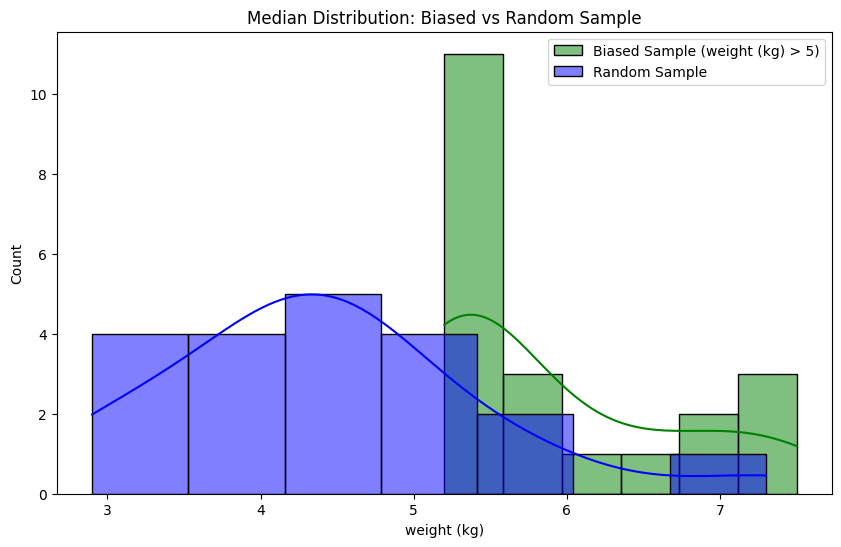

In [55]:
#Define a biased sample (weight > 5 kg)

biased_sample = a[a['weight (kg)'] > 5]
# Random sample for comparison
random_sample = a.sample(n=len(biased_sample), random_state=1)
print("Biased sample mean weight:", biased_sample['weight (kg)'].mean())
print("Random sample mean weight:", random_sample['weight (kg)'].mean())

# Plot comparison
plt.figure(figsize=(10, 6))
sns.histplot(biased_sample['weight (kg)'], color='green', label='Biased Sample (weight (kg) > 5)', kde=True)
sns.histplot(simple_random_sample['weight (kg)'], color='blue', label='Random Sample', kde=True)
plt.legend()
plt.title("Median Distribution: Biased vs Random Sample")
plt.show()

# **5. Imbalanced Data**

Handling Imbalance in 'cat_friendly' (highly sparse data)

In [56]:
# Check class distribution of AgeCategory
age_category_counts = a['lifespan (short/long)'].value_counts()
print("lifespan (short/long) Distribution:", age_category_counts)

# Oversample minority classes to balance the dataset
balanced_data = a.copy()
for level in age_category_counts.index[1:]:
    sample = balanced_data[balanced_data['lifespan (short/long)'] == level]
    balanced_data = pd.concat([balanced_data, resample(sample, replace=True, n_samples=age_category_counts.max(), random_state=42)])

print("New life span Distribution after balancing:", balanced_data['lifespan (short/long)'].value_counts())

lifespan (short/long) Distribution: lifespan (short/long)
Short lifespan    55
Long lifespan     12
Name: count, dtype: int64
New life span Distribution after balancing: lifespan (short/long)
Long lifespan     67
Short lifespan    55
Name: count, dtype: int64


# **6. Central Limit Theorem (CLT)**

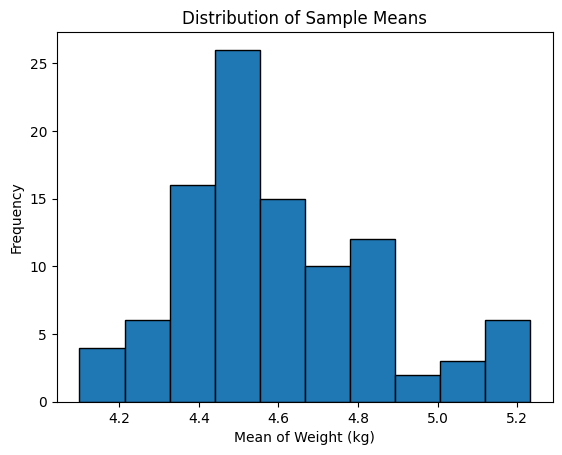

In [57]:
sample_means = []
for _ in range(100):
    sample = a.sample(n=15)
    sample_means.append(sample['weight (kg)'].mean())

# Plot distribution of sample means
plt.hist(sample_means, bins=10, edgecolor='black')
plt.title('Distribution of Sample Means')
plt.xlabel('Mean of Weight (kg)')
plt.ylabel('Frequency')
plt.show()

# **7. Confidence Intervals**

Calculate 95% confidence interval for 'energy_level'

In [58]:
mean_energy = a['energy_level'].mean()
se_energy = a['energy_level'].std() / np.sqrt(len(a['energy_level']))

# 95% confidence interval
ci_low, ci_high = stats.norm.interval(0.95, loc=mean_energy, scale=se_energy)
print(f"95% confidence interval for mean energy level: [{ci_low}, {ci_high}]")

95% confidence interval for mean energy level: [3.6578252050338653, 4.163070317354195]


This means that we are 95% confident that the true population mean energy level lies within this range.

# **8. Hypothesis Testing**

In [59]:
# Split data based on hypoallergenic status
hypoallergenic = a[a['hypoallergenic'] == 1]
non_hypoallergenic = a[a['hypoallergenic'] == 0]


from scipy.stats import ttest_ind
# Perform t-test to compare weights between hypoallergenic and non-hypoallergenic cats
t_stat, p_val = ttest_ind(hypoallergenic['weight (kg)'].dropna(), non_hypoallergenic['weight (kg)'].dropna())
print(f"T-statistic: {t_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: Hypoallergenic cats have a significantly different average weight.")
else:
    print("Fail to reject the null hypothesis: No significant difference in weight between hypoallergenic and non-hypoallergenic cats.")

T-statistic: -2.293743084994498, P-value: 0.02504677607161659
Reject the null hypothesis: Hypoallergenic cats have a significantly different average weight.


**Decision Rule:**

Typically, a significance level of 0.05 is used. If the p-value is less than the significance level, we reject the null hypothesis.

In this case, the p-value (0.0250) is less than 0.05, so we reject the null hypothesis. This means that we have strong evidence to conclude that there is a statistically significant difference in the average weight between hypoallergenic and non-hypoallergenic cats.